### 

In [3]:
from fenics import *
import matplotlib.pyplot as plt

# Create mesh
nx = ny = 1000
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary_bottom_top(x, on_boundary):
    return on_boundary and (near(x[1], 0) or near(x[1], 1))

def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

bc_bottom_top = DirichletBC(V, Constant(0), boundary_bottom_top)
bc_left = DirichletBC(V, Expression('sin(pi*x[1])', degree=2), boundary_left)
bc_right = DirichletBC(V, Expression('2*sin(pi*x[1])', degree=2), boundary_right)

bcs = [bc_bottom_top, bc_left, bc_right]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

# 定义双线性形式
a = 0.001 * dot(grad(u), grad(v)) * dx + u.dx(0) * v * dx
L = f * v * dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
plot_object = plot(u)
plt.colorbar(plot_object, label="u")
plt.title("Solution u(x, y)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

  Solving linear variational problem.


KeyboardInterrupt: 

  Solving linear variational problem.


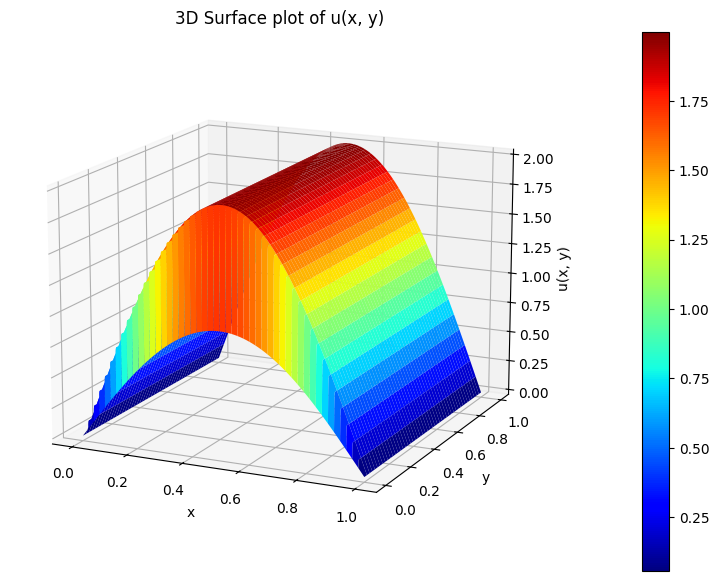

最大值: 2.0


(1442401,)

In [5]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Create mesh
nx = ny = 1200
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary_bottom_top(x, on_boundary):
    return on_boundary and (near(x[1], 0) or near(x[1], 1))

def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

bc_bottom_top = DirichletBC(V, Constant(0), boundary_bottom_top)
bc_left = DirichletBC(V, Expression('sin(pi*x[1])', degree=2), boundary_left)
bc_right = DirichletBC(V, Expression('2*sin(pi*x[1])', degree=2), boundary_right)

bcs = [bc_bottom_top, bc_left, bc_right]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

a = 0.001 * dot(grad(u), grad(v)) * dx + u.dx(0) * v * dx
L = f * v * dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# 提取 FEniCS 函数的值到 NumPy 数组中
u_values = u.compute_vertex_values(mesh)
u_array = np.reshape(u_values, (ny+1, nx+1))  # 重新整形为二维数组

# 创建网格
X, Y = np.meshgrid(np.linspace(0, 1, nx+1), np.linspace(0, 1, ny+1))

# 绘制三维曲面
fig = plt.figure(figsize=(24, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_array, cmap='jet', edgecolor='none')
norm = mcolors.Normalize(vmin=u_array.min(), vmax=u_array.max())
cbar = fig.colorbar(surf, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('3D Surface plot of u(x, y)')
ax.view_init(elev=15, azim=-65)  

# 显示图形
plt.show()

# data = np.column_stack((mesh.coordinates(), u_values))
# np.savetxt("4-0.001-1.csv", data, delimiter=",", header="x, y, u", comments="")

max_u = np.max(u_values)

print("最大值:", max_u)

u_values.shape

  Solving linear variational problem.


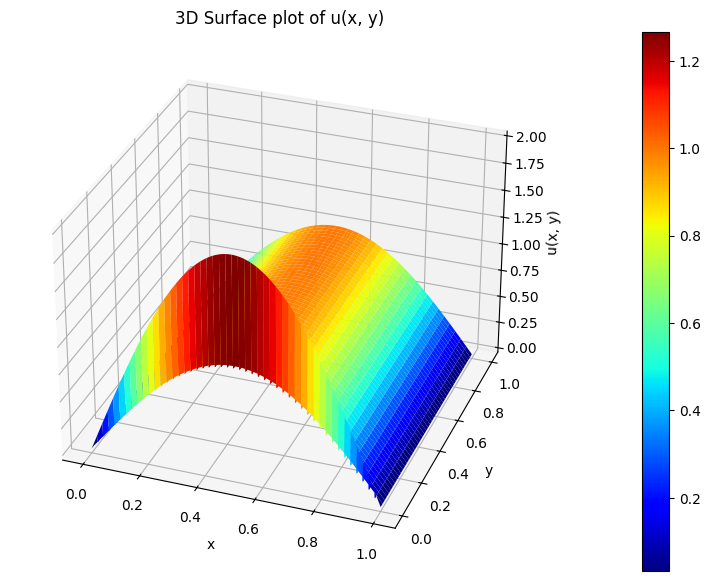

最大值: 2.0


(1442401,)

In [8]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Create mesh
nx = ny = 1200
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary_bottom_top(x, on_boundary):
    return on_boundary and (near(x[0], 0) or near(x[0], 1))

def boundary_left(x, on_boundary):
    return on_boundary and near(x[1], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[1], 1)

bc_bottom_top = DirichletBC(V, Constant(0), boundary_bottom_top)
bc_left = DirichletBC(V, Expression('2*sin(pi*x[0])', degree=2), boundary_left)
bc_right = DirichletBC(V, Expression('sin(pi*x[0])', degree=2), boundary_right)

bcs = [bc_bottom_top, bc_left, bc_right]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

a = -0.001 * dot(grad(u), grad(v)) * dx + u.dx(1) * v * dx
L = f * v * dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# 提取 FEniCS 函数的值到 NumPy 数组中
u_values = u.compute_vertex_values(mesh)
u_array = np.reshape(u_values, (ny+1, nx+1))  # 重新整形为二维数组

# 创建网格
X, Y = np.meshgrid(np.linspace(0, 1, nx+1), np.linspace(0, 1, ny+1))

# 绘制三维曲面
fig = plt.figure(figsize=(24, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_array, cmap='jet', edgecolor='none')
norm = mcolors.Normalize(vmin=u_array.min(), vmax=u_array.max())
cbar = fig.colorbar(surf, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('3D Surface plot of u(x, y)')
ax.view_init(elev=30, azim=-70)  

# 显示图形
plt.show()

data = np.column_stack((mesh.coordinates(), u_values))
np.savetxt("5—0.001—1.csv", data, delimiter=",", header="x, y, u", comments="")

max_u = np.max(u_values)

print("最大值:", max_u)

u_values.shape

In [2]:
import jax
print(jax.__version__)

0.4.30


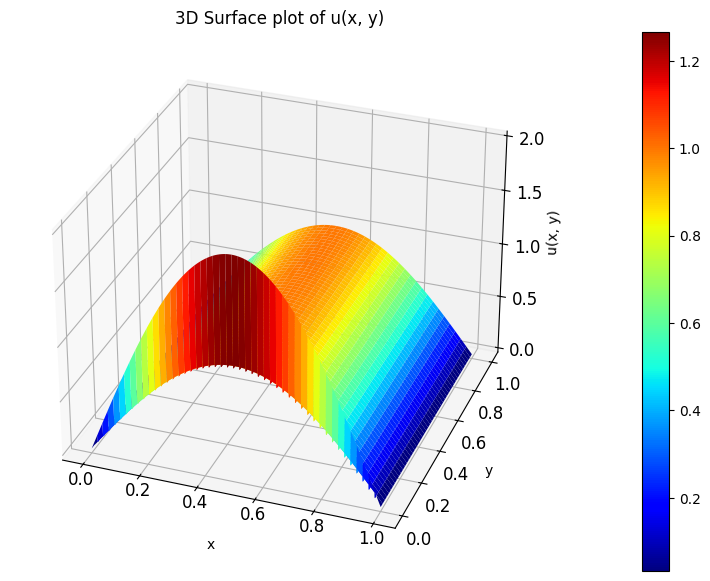

In [9]:


fig = plt.figure(figsize=(24, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_array, cmap='jet', edgecolor='none')
norm = mcolors.Normalize(vmin=u_array.min(), vmax=u_array.max())
cbar = fig.colorbar(surf, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('3D Surface plot of u(x, y)')
ax.view_init(elev=30, azim=-70)  

ax.tick_params(axis='z', pad=4)
ax.tick_params(axis='x', pad=-5)
ax.tick_params(axis='y', pad=2)
ax.tick_params(which='major', labelsize=12)
ax.locator_params(axis='z', nbins=5)
# 显示图形
plt.show()

In [1]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Create mesh
nx = ny = 1200
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary_bottom_left(x, on_boundary):
    return on_boundary and (near(x[0], 0) or near(x[0], 1))

def boundary_top(x, on_boundary):
    return on_boundary and near(x[1], 0)

def boundary_down(x, on_boundary):
    return on_boundary and near(x[1], 1)

bc_bottom_left = DirichletBC(V, Constant(0), boundary_bottom_left)
bc_top = DirichletBC(V, Expression('2*sin(pi*x[0])', degree=2), boundary_top)
bc_down = DirichletBC(V, Expression('1*sin(pi*x[0])', degree=2), boundary_down)

bcs = [bc_top, bc_down, bc_bottom_left]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

a = -0.001 * dot(grad(u), grad(v)) * dx + u.dx(0) * v * dx + u.dx(1) * v * dx
L = f * v * dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# 提取 FEniCS 函数的值到 NumPy 数组中
u_values = u.compute_vertex_values(mesh)
u_array = np.reshape(u_values, (ny+1, nx+1))  # 重新整形为二维数组

# 创建网格
X, Y = np.meshgrid(np.linspace(0, 1, nx+1), np.linspace(0, 1, ny+1))

# 绘制三维曲面
fig = plt.figure(figsize=(24, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_array, cmap='jet', edgecolor='none')
norm = mcolors.Normalize(vmin=u_array.min(), vmax=u_array.max())
cbar = fig.colorbar(surf, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('3D Surface plot of u(x, y)')
ax.view_init(elev=15, azim=-105)  


# 显示图形
plt.show()

data = np.column_stack((mesh.coordinates(), u_values))
np.savetxt("6—0.001—1.csv", data, delimiter=",", header="x, y, u", comments="")

max_u = np.max(u_values)

print("最大值:", max_u)

u_values.shape

ModuleNotFoundError: No module named 'fenics'

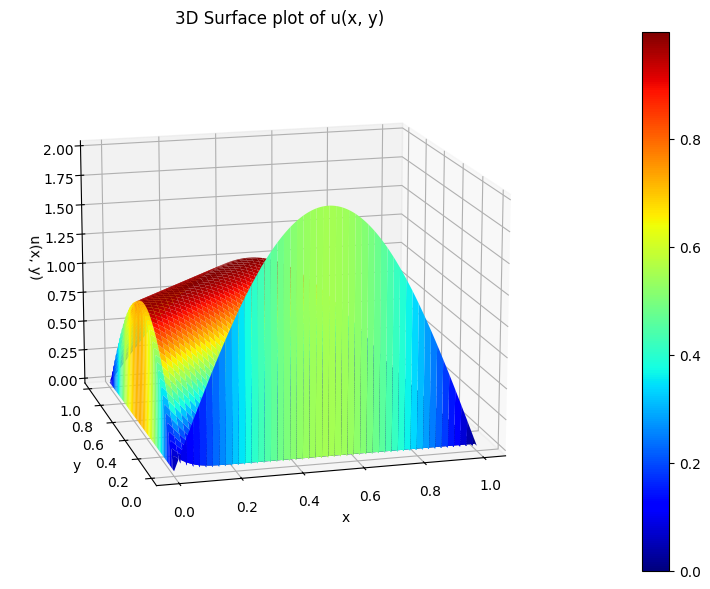

最大值: 2.0


(1002001,)

In [ ]:
fig = plt.figure(figsize=(24, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u_array, cmap='jet', edgecolor='none')
norm = mcolors.Normalize(vmin=u_array.min(), vmax=u_array.max())
cbar = fig.colorbar(surf, norm=norm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('3D Surface plot of u(x, y)')
ax.view_init(elev=15, azim=-105)  

# 显示图形
plt.show()

max_u = np.max(u_values)

print("最大值:", max_u)

u_values.shape

In [ ]:
from fenics import *
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Define mesh and function space
nx = 1000
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
def boundary(x, on_boundary):
    return on_boundary

# Define boundary conditions
bc_left = DirichletBC(V, Constant(0), boundary)
bc_right = DirichletBC(V, Constant(1), boundary)
bcs = [bc_left, bc_right]

# Define initial condition
u_initial = Expression('sin(2*pi*x[0])', degree=2)

x = SpatialCoordinate(mesh)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)
dt = 0.01
a = (x[0]*u)*v*dx + dt*0.01*dot(grad(u), grad(v))*dx + u.dx(0)*v*dx
L = (u_initial*v + dt*f*v)*dx

# Time-stepping
T = 1.0  # final time
num_steps = int(T / dt)

# Define function to store solution
u = Function(V)

# Time-stepping loop
t = 0
for n in range(num_steps):
    # Update current time
    t += dt
    
    # Solve variational problem
    solve(a == L, u, bcs)
    
    plot(u, title='u(x, t) at t = {}'.format(t))
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.show()
    # Update initial condition for next time step
    u_initial = u

# # 获取解的数值值
# u_values = u.compute_vertex_values(mesh)

# # 创建网格
# X = np.linspace(0, 1, nx+1)

# # 绘制曲线图
# plt.figure(figsize=(10, 6))
# plt.plot(X, u_values)
# plt.xlabel('x')
# plt.ylabel('u(x, t)')
# plt.title('Plot of u(x, t) along x-axis')
# plt.grid(True)
# plt.show()

# max_u = np.max(u_values)
# print("最大值:", max_u)
# min_u = np.min(u_values)
# print("最小值:", min_u)
# u_values.shape



In [ ]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

T = 1.0
num_steps = 100
dt = T / num_steps

nx = 100
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, 'P', 1)

def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

bc_left = DirichletBC(V, Constant(0), boundary_left)
bc_right = DirichletBC(V, Constant(1), boundary_right)
bcs = [bc_left, bc_right]

u_0 = Expression('sin(2*pi*x[0])', degree=2, t=0)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

# F = u*v*dx + dt*0.01*dot(grad(u), grad(v))*dx + u.dx(0)*v*dx

a = u*v*dx + dt*0.01*dot(grad(u), grad(v))*dx + u.dx(0)*v*dx
L = u_0*v*dx + dt*f*v*dx

u = Function(V)
t = 0

for n in range(num_steps):
    
    t += dt
    
    solve(a == L, u, bcs)
    u_0 = u
    
plot(u, title='u(x, t) at t = {}'.format(t))
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.show()    


In [ ]:
from fenics import *
import matplotlib.pyplot as plt
import numpy as np

# 问题参数
T = 1.0
num_steps = 100
dt = T / num_steps

# 网格和函数空间
nx = 100
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, 'P', 1)

# 边界条件
def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

bc_left = DirichletBC(V, Constant(0), boundary_left)
bc_right = DirichletBC(V, Constant(1), boundary_right)

# 初始条件
u_0 = Expression('sin(2*pi*x[0])', degree=2)

# 创建 Function 对象用于存储解
u = interpolate(u_0, V)

# 试验函数和测试函数
u_t = TrialFunction(V)
v = TestFunction(V)

# 定义双线性形式 a 和线性形式 L
a = u_t*v*dx + dt*0.01*dot(grad(u_t), grad(v))*dx
L = Constant(0)*v*dx

# 时间迭代
t = 0
for n in range(num_steps):
    t += dt

    # 更新初始条件表达式的时间
    u_0.t = t

    # 解变分问题
    solve(a == L, u, bcs=[bc_left, bc_right])

    # 绘制当前解
    plt.cla()  # 清除旧图形
    plt.plot(mesh.coordinates(), u.vector(), label='u(x, t={})'.format(t))
    plt.legend()
    # plt.title('u(x, t) at t = {}'.format(t))
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.pause(0.01)  # 暂停一点时间以更新绘图

# 显示最终结果
plt.show()


In [ ]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

nx = nt = 1000
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, nt)

V = FunctionSpace(mesh, 'P', 1)

def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

def boundary_top(x, on_boundary):
    return on_boundary and near(x[1], 0)

def boundary_down(x, on_boundary):
    return on_boundary and near(x[1], 1)

bc_left = DirichletBC(V, Constant(0), boundary_left)
bc_right = DirichletBC(V, Constant(1), boundary_right)
bc_top = DirichletBC(V, Expression('sin(2*pi*x[0])', degree=2), boundary_top)
bc_down = DirichletBC(V, Constant(0), boundary_down)

bcs = [bc_top, bc_down, bc_left, bc_right]


Solving linear variational problem.


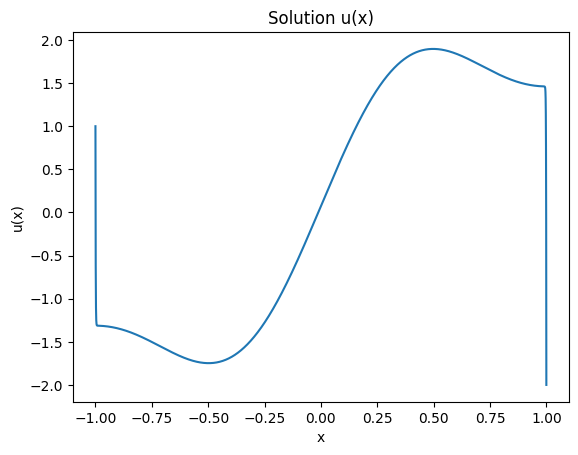

In [ ]:
import numpy as np
from fenics import *
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Create mesh
nx = 10000
mesh = IntervalMesh(nx, -1, 1)

# Define function space
V = FunctionSpace(mesh, 'P', 1)

def boundary_left(x, on_boundary):
    return on_boundary and near(x[0], -1)

def boundary_right(x, on_boundary):
    return on_boundary and near(x[0], 1)

# Define boundary conditions
bc_left = DirichletBC(V, Constant(1), boundary_left)
bc_right = DirichletBC(V, Constant(-2), boundary_right)
bc = [bc_left, bc_right]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

x = SpatialCoordinate(mesh)
a = 1e-3 * dot(grad(u), grad(v)) * dx + x[0] * u.dx(0) * v * dx
L = sin(2*pi*x[0]) * v * dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution if needed
plot(u)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution u(x)')
plt.show()

# # Extract mesh coordinates and function values
# mesh_coordinates = mesh.coordinates()
# u_values = u.compute_vertex_values(mesh)

# # Combine coordinates and values into a single array
# data = np.column_stack((mesh_coordinates, u_values))

# # Save to CSV file
# np.savetxt('solution4.csv', data, delimiter=',', header='x,u', comments='')

# print("Solution saved to solution.csv")
